In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [2]:
df= pd.read_csv("CAR DETAILS.csv")

df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Present_Price
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,5.453875
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,9.508536
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,4.782948
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4.618308
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,5.119626


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4340 non-null   int64  
 3   km_driven      4340 non-null   int64  
 4   fuel           4340 non-null   object 
 5   seller_type    4340 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
 8   Present_Price  4340 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 305.3+ KB


In [4]:
#to check if there is any null value
df.isnull().sum() 

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Present_Price    0
dtype: int64

In [5]:
#to get statistical data (numeric data)
df.describe()


,year,selling_price,km_driven,Present_Price
count,4340.000000,4.340000e+03,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,5.435213
std,4.215344,5.785487e+05,46644.102194,3.182367
min,1992.000000,2.000000e+04,1.000000,0.002307
25%,2011.000000,2.087498e+05,35000.000000,2.635383
50%,2014.000000,3.500000e+05,60000.000000,5.327309
75%,2016.000000,6.000000e+05,90000.000000,8.250035
max,2020.000000,8.900000e+06,806599.000000,10.990571


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Present_Price'],
      dtype='object')

In [7]:
print(df['fuel'].value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [8]:
print(df['seller_type'].value_counts())

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


In [9]:
print(df['owner'].value_counts())

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [10]:
print(df['transmission'].value_counts())

Manual       3892
Automatic     448
Name: transmission, dtype: int64


In [11]:
fuel = df['fuel']
seller_type = df['seller_type']
transmission_type = df['transmission']
selling_price = df['selling_price']

In [12]:
from matplotlib import style

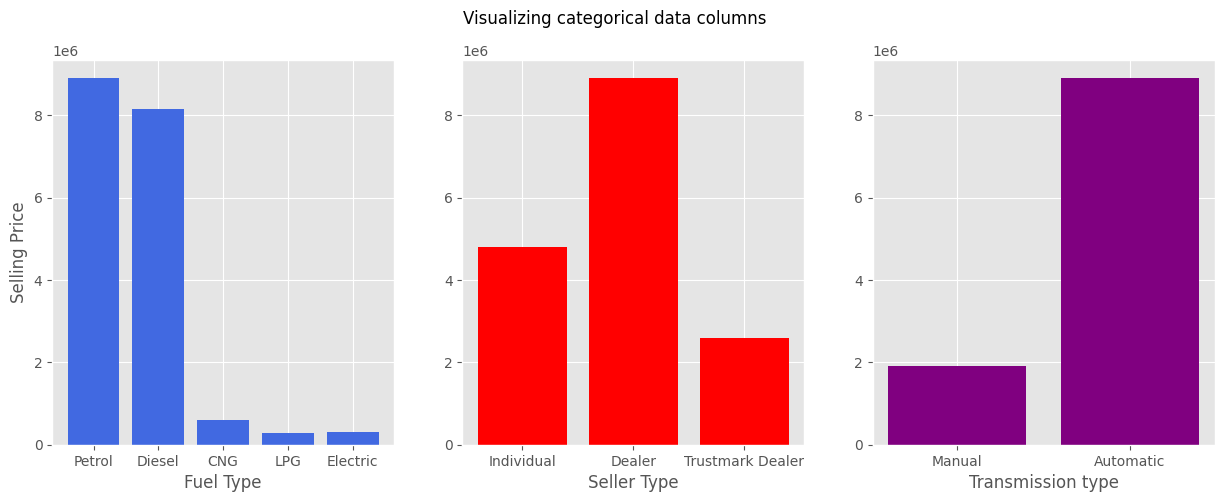

In [13]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()



<AxesSubplot: xlabel='transmission', ylabel='selling_price'>

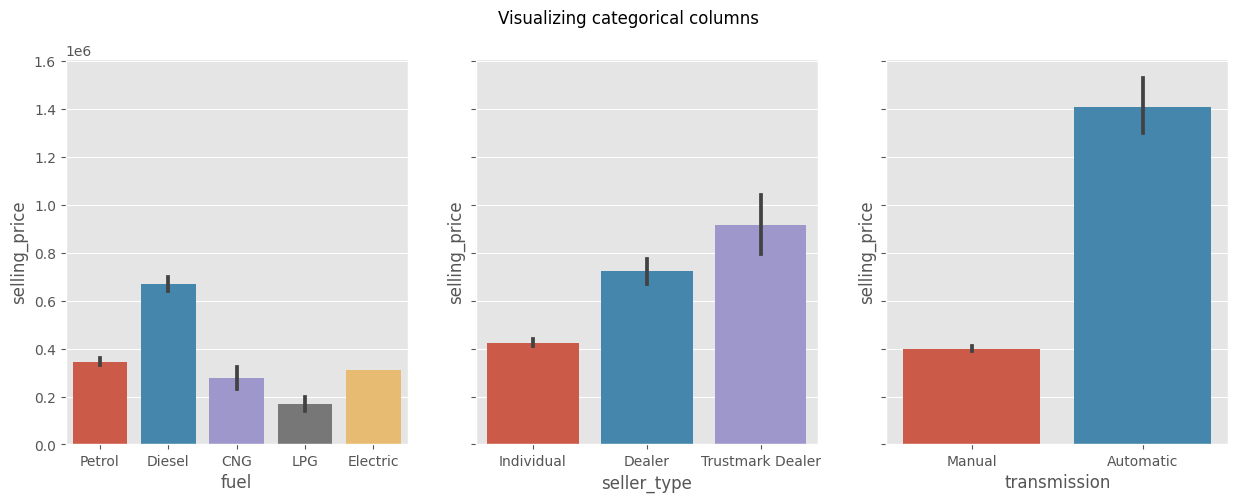

In [14]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [15]:
petrol_data = df.groupby('fuel').get_group('Petrol')
petrol_data.describe()

,year,selling_price,km_driven,Present_Price
count,2123.000000,2.123000e+03,2123.000000,2123.000000
mean,2012.595855,3.448401e+05,52340.079604,5.459261
std,4.847011,3.636728e+05,38109.196219,3.157537
min,1992.000000,2.000000e+04,101.000000,0.002307
25%,2009.000000,1.500000e+05,25000.000000,2.659932
50%,2014.000000,2.690000e+05,50000.000000,5.360196
75%,2017.000000,4.500000e+05,70000.000000,8.242906
max,2020.000000,8.900000e+06,806599.000000,10.990571


In [16]:
seller_data = df.groupby('seller_type').get_group('Trustmark Dealer')
seller_data.describe()

,year,selling_price,km_driven,Present_Price
count,102.000000,1.020000e+02,102.000000,102.000000
mean,2015.813725,9.149510e+05,39202.215686,5.012847
std,1.002279,6.373613e+05,19767.907010,3.197778
min,2013.000000,2.950000e+05,6480.000000,0.052538
25%,2015.000000,6.250000e+05,18628.500000,2.241762
50%,2016.000000,7.500000e+05,46507.000000,4.766484
75%,2017.000000,7.675000e+05,54746.500000,8.102296
max,2018.000000,2.600000e+06,79641.000000,10.751277


In [17]:
#to convert categorical data to numeric data
#manual encoding or Huffmann encoding

In [18]:
#manual encoding
df.replace({'fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3 ,'Electric':4}}, inplace=True)
df.head(15)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Present_Price
0,Maruti 800 AC,2007,60000,70000,0,Individual,Manual,First Owner,5.453875
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Individual,Manual,First Owner,9.508536
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Individual,Manual,First Owner,4.782948
3,Datsun RediGO T Option,2017,250000,46000,0,Individual,Manual,First Owner,4.618308
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Individual,Manual,Second Owner,5.119626
5,Maruti Alto LX BSIII,2007,140000,125000,0,Individual,Manual,First Owner,9.284865
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,0,Individual,Manual,First Owner,2.587392
7,Tata Indigo Grand Petrol,2014,240000,60000,0,Individual,Manual,Second Owner,1.955153
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,0,Individual,Manual,First Owner,1.669206
9,Maruti Celerio Green VXI,2017,365000,78000,2,Individual,Manual,First Owner,9.643775


In [19]:
#one hot encoding
df = pd.get_dummies(df, columns=['seller_type', 'transmission'], drop_first=True)
df.head()

,name,year,selling_price,km_driven,fuel,owner,Present_Price,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti 800 AC,2007,60000,70000,0,First Owner,5.453875,1,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,First Owner,9.508536,1,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,First Owner,4.782948,1,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,First Owner,4.618308,1,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Second Owner,5.119626,1,0,1


/tmp/ipykernel_17962/3966882736.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


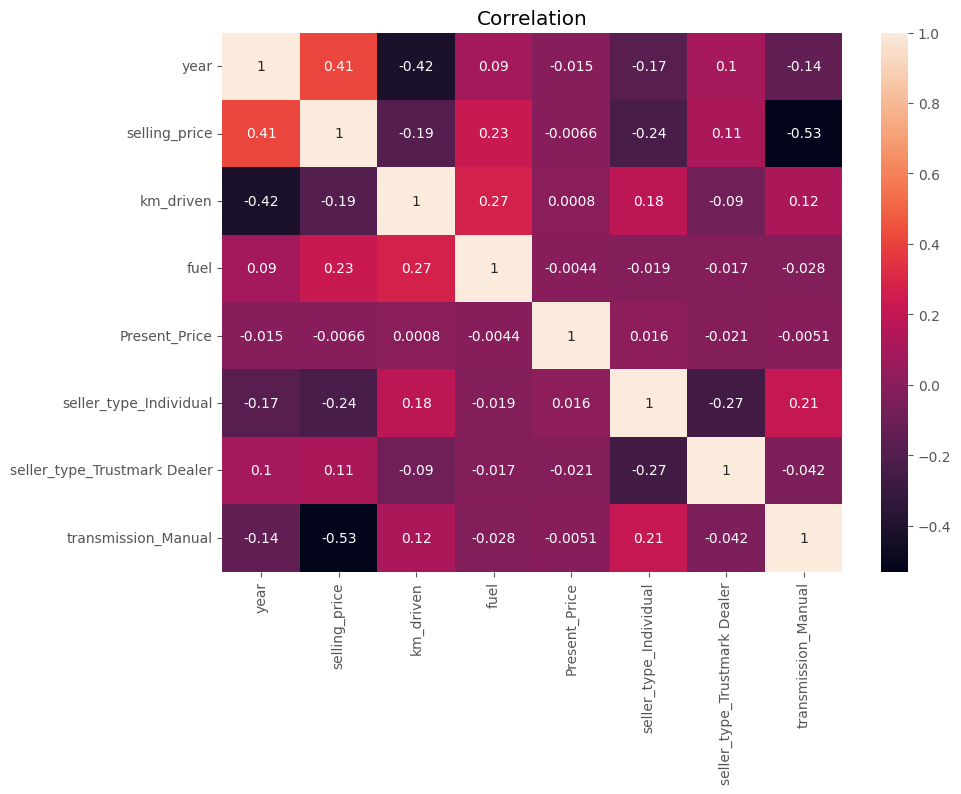

In [20]:
#heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation')
plt.show()

#light colour-high value of correlation
#dark colour-low value of correlation

<AxesSubplot: title={'center': 'Correlation between present price and selling price'}, xlabel='Present_Price', ylabel='selling_price'>

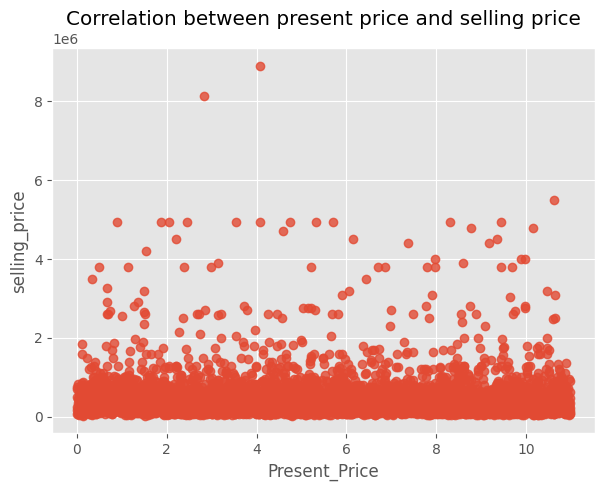

In [21]:
present_price = df['Present_Price']
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='selling_price', data=df)

In [28]:
#manual encoding

df.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3 ,'Test Drive Car':4}}, inplace=True)
df.head(15)

,name,year,selling_price,km_driven,fuel,owner,Present_Price,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti 800 AC,2007,60000,70000,0,0,5.453875,1,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,9.508536,1,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,4.782948,1,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,0,4.618308,1,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,5.119626,1,0,1
5,Maruti Alto LX BSIII,2007,140000,125000,0,0,9.284865,1,0,1
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,0,0,2.587392,1,0,1
7,Tata Indigo Grand Petrol,2014,240000,60000,0,1,1.955153,1,0,1
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,0,0,1.669206,1,0,1
9,Maruti Celerio Green VXI,2017,365000,78000,2,0,9.643775,1,0,1


In [29]:
X = df.drop(['name','selling_price'], axis=1)
y = df['selling_price']

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (4340, 8)
Shape of y is:  (4340,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (1302, 8)
X_train shape: (3038, 8)
y_test shape:  (1302,)
y_train shape: (3038,)


In [31]:
#to normalise data in different columns

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
model = LinearRegression()

In [33]:
df.info() 
#to check NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          4340 non-null   object 
 1   year                          4340 non-null   int64  
 2   selling_price                 4340 non-null   int64  
 3   km_driven                     4340 non-null   int64  
 4   fuel                          4340 non-null   int64  
 5   owner                         4340 non-null   int64  
 6   Present_Price                 4340 non-null   float64
 7   seller_type_Individual        4340 non-null   uint8  
 8   seller_type_Trustmark Dealer  4340 non-null   uint8  
 9   transmission_Manual           4340 non-null   uint8  
dtypes: float64(1), int64(5), object(1), uint8(3)
memory usage: 250.2+ KB


In [34]:
#df.isna()
#df.X=df.X.fillna(0)

In [35]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: ", (metrics.mean_absolute_error(pred, y_test)))
print("Mean Squared Error: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

Mean Absolute Error:  220114.35132303523
Mean Squared Error:  167767846170.8254
R2 score:  -0.1418334279349185


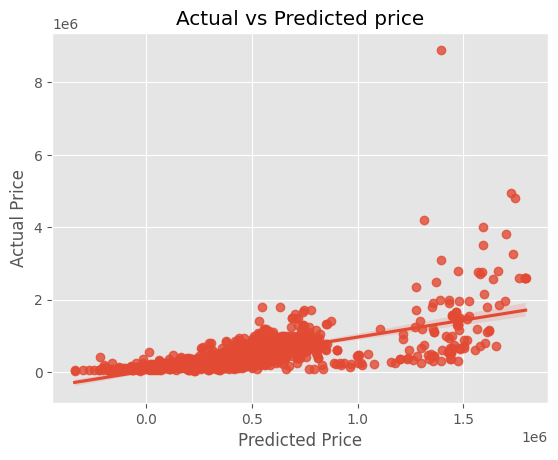

In [37]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs Predicted price")
plt.show()